# The Traveling Salesman Problem

In [1]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
# from matplotlib import animation

In [2]:
def fitness(sequence):
    f = lambda a1, a2: np.sqrt(np.sum(np.square(a1 - a2), axis=1))
    a1, a2 = A[sequence], np.roll(A[sequence], 1, axis=0)
    return f(a1, a2).sum()

In [3]:
Ncity = 10
x_min, x_max = 0, 20
y_min, y_max = 0, 10

A = np.random.random((Ncity, 2))

A[:, 0] = x_min + A[:, 0] * (x_max - x_min)
A[:, 1] = y_min + A[:, 1] * (y_max - y_min)

In [4]:
def factorial(n):
    if n == 1:
        return n
    else:
        return n * factorial(n - 1)

# def permutations(*pool):
#     *perm_list
#     if len(pool) > 1:
#         for i in range(len(pool)):
#             left = pool[:i] + pool[i+1:]
#             perm_list.append(pool[i:i+1] + permutations(pool[:i] + pool[i+1:]))
#         return perm_list
#     else:
#         return pool

# permutations([0, 1, 2, 3]) 

In [5]:
import itertools
import time
t0 = time.time()

vopt = np.inf
v_list = []
all_generation = []
for a in itertools.permutations(range(Ncity)):
    s = list(a)
    this = fitness(s)
    if this < vopt:
        vopt = this
        all_generation.append(s)
        v_list.append(this)
print("Total time %.1f" %(time.time() - t0))

Total time 132.0


<IPython.core.display.Javascript object>


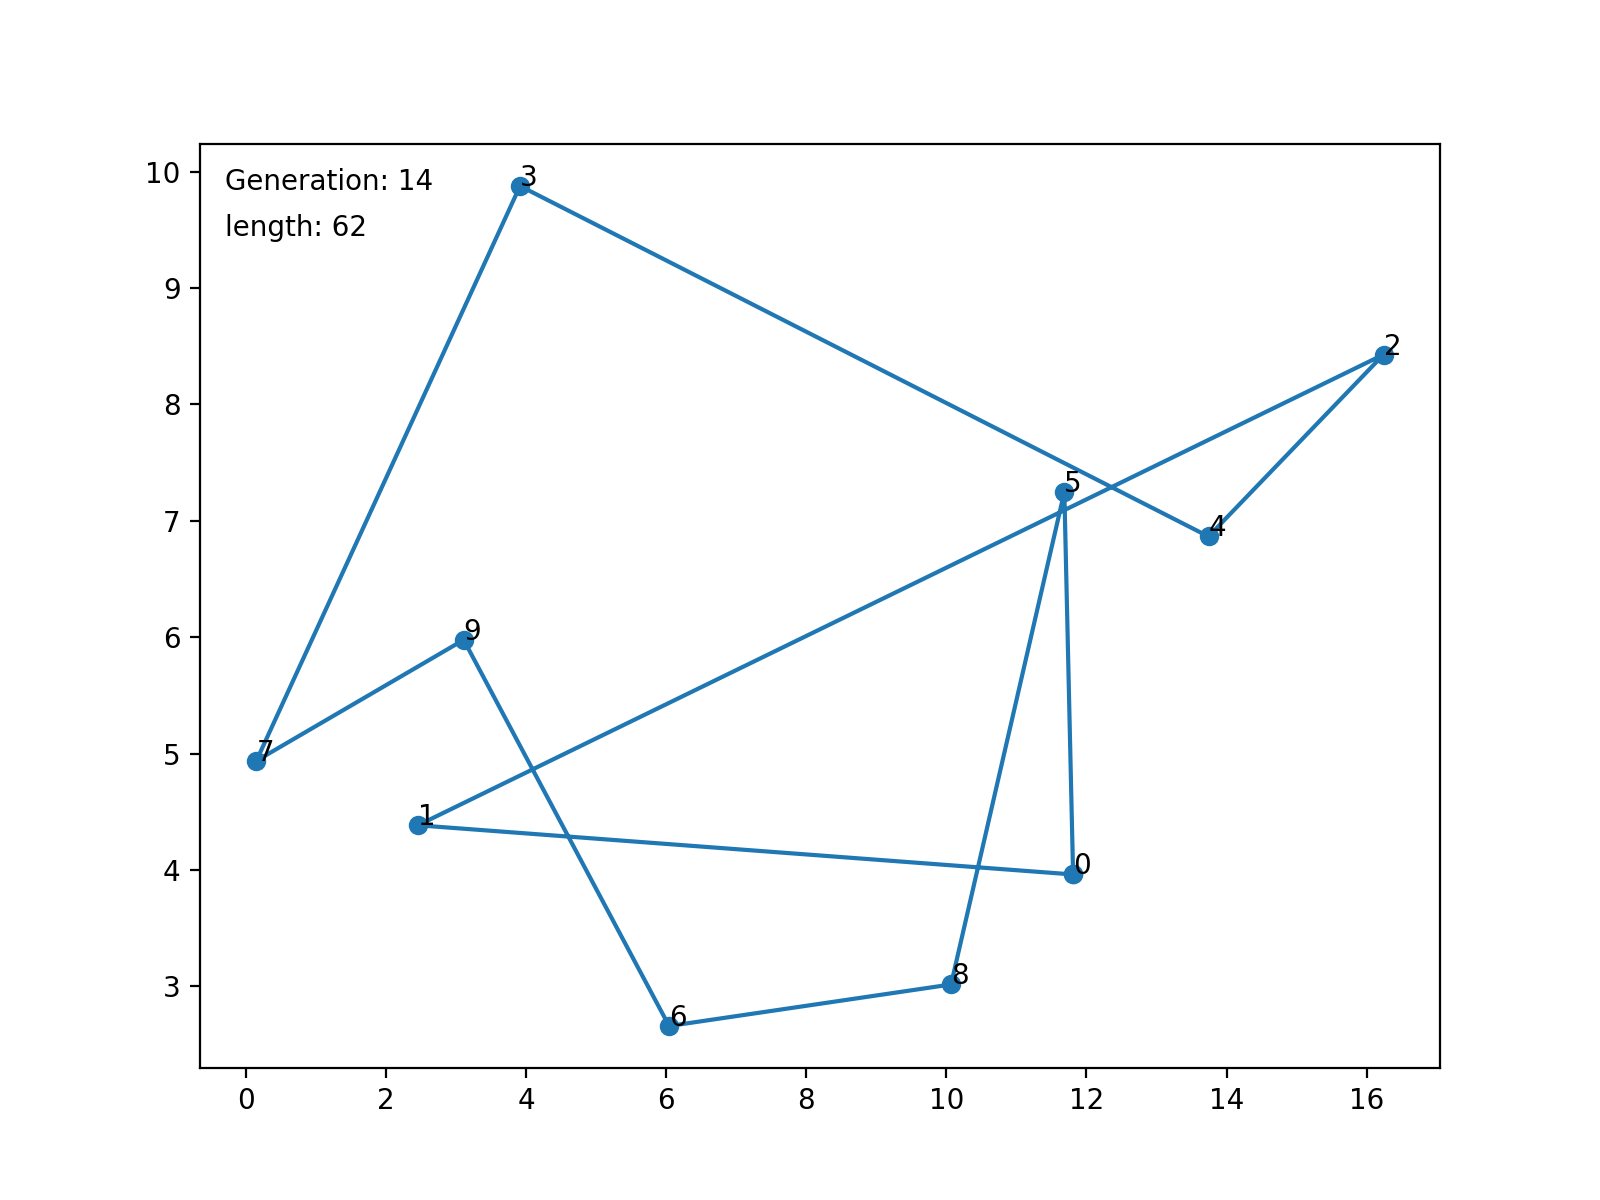

In [7]:
%matplotlib notebook
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure(figsize=(8, 6))
ax = plt.axes(xlim=(x_min, x_max), ylim=(y_min, y_max))

ax.scatter(A[:, 0], A[:, 1], s = 20)
    
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    ax.clear()
    for j in range(len(A)):
        ax.text(A[j, 0], A[j, 1], str(j))
        
    ax.text(0.02, 0.95, 'Generation: %d' %i, transform=ax.transAxes)
    
    best = all_generation[i]
    
    ax.text(0.02, 0.90, 'length: %d' % v_list[i], transform=ax.transAxes)
    #ax.text(0.02, 0.85, 'Route:' + str(best), transform=ax.transAxes)
    
    pos = A[best]
    x = list(pos[:, 0]) + [pos[0, 0]]
    y = list(pos[:, 1]) + [pos[0, 1]]
    ax.plot(x, y, ls = '-', marker='o')
    
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.arange(len(v_list)), interval=1000, blit=True)

plt.show()